In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Testing
### Rastringin function

In [2]:
A = 10
d = 2
def Rastringin(x):
    return (A*d + np.dot(x,x) - A*np.sum(np.cos(2.*np.pi*x)))

In [3]:
def Rastringin_gradient(x):
    grad = np.empty(len(x))
    for i in range(len(grad)):
        grad[i] = (2.*x[i] + A*np.sin(2.*np.pi*x[i])*2.*np.pi)
    return grad

In [4]:
def Rastringin_hessian(x):
    hess = np.zeros((len(x),len(x)))
    for i in range(len(hess)):
        hess[i,i] = (2 + A*np.cos(2.*np.pi*x[i])*(4.*np.pi*np.pi))
    return hess

In [5]:
X = np.arange(-5,5,1e-1)
Y = np.arange(-5,5,1e-1)

In [6]:
Z = np.empty((len(X),len(Y)))

In [7]:
for i in range(len(X)):
    for j in range((len(Y))):
        Z[i,j] = Rastringin(np.array([X[i],Y[j]]))

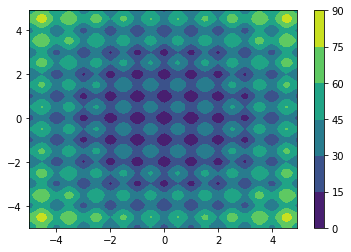

In [8]:
plt.contourf(X,Y,Z); plt.colorbar();

In [9]:
k = 2
bounds = np.ones((k,2))*5; bounds[:,0] = bounds[:,1]*(-1);
bounds;

In [5]:
%run HXDY.ipynb

In [11]:
res = HXDY(fun=Rastringin, bounds=bounds, args=(), jac=Rastringin_gradient, tol=1e-2, 
                                  hess=Rastringin_hessian, epsilon=1e-8, maxCount=30, alpha=.1, 
                                  unfairness=5, N=100, keepLastX = 5, numWorkers=-1, method='Newton-CG'); 

Process ForkPoolWorker-4:
Process ForkPoolWorker-3:
Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/synchronize.py", li

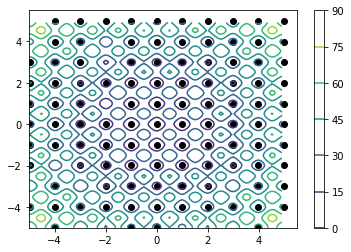

In [12]:
plt.scatter(res[:,0], res[:,1], color='black');
plt.contour(X,Y,Z); plt.colorbar();

### Schwefel Function

In [6]:
def Schwefel(x):
    total = 0
    for i in range(len(x)):
        if np.abs(x[i]) <= 500:
            total += -x[i]*np.sin(np.sqrt(np.abs(x[i])))
        else:
            total += .02*x[i]*x[i]
    return -(-418.9829*(len(x)+1) - total)

In [7]:
def Schwefel_gradient(X):
    y = np.empty(len(X))

    Sin = np.sin
    Abs = np.abs
    Cos = np.cos
    Sqrt = np.sqrt

    for i in range(len(X)):
        x = X[i]

        if x<0:
            slope = -1.
        else:
            slope = 1.

        y[i] = -Sin(Sqrt(Abs(x))) - x*Cos(Sqrt(Abs(x)))*slope/(2.*Sqrt(Abs(x)))
    return -y

In [8]:
def Schwefel_hessian(x):
    Sin = np.sin
    Abs = np.abs
    Cos = np.cos
    Sqrt = np.sqrt
        
    hess = np.zeros((len(x), len(x)))
    
    for i in range(len(x)):
        xi = x[i]
        if xi<0:
            slope = -1.
        else:
            slope = 1.

        factor = 1./(4.*Abs(xi)**1.5)
        term1 = xi*Sqrt(Abs(xi))*Sin(Sqrt(Abs(xi)))
        term2 = Cos(Sqrt(Abs(xi)))*(xi-2.*Abs(xi)*(2.*slope))
        hess[i,i] = factor*(term1+term2)
    return - hess

In [9]:
X = np.arange(-500,500,1e0)
Y = np.arange(-500,500,1e0)

In [10]:
Z = np.empty((len(X),len(Y)))

In [11]:
for i in range(len(X)):
    for j in range((len(Y))):
        Z[i,j] = Schwefel(np.array([X[i],Y[j]]))

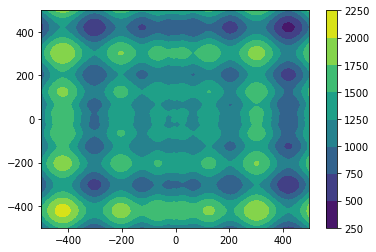

In [12]:
plt.contourf(X,Y,Z); plt.colorbar();

In [13]:
k = 2
bounds = np.ones((k,2))*500; bounds[:,0] = bounds[:,1]*(-1);
bounds;

In [14]:
from time import process_time

In [15]:
%run HXDY.ipynb

In [16]:
def wrapper_boi(params):
    unfairness, cauchy_wildness, tol, maxCount, alpha = params
    TOTAL = 0
    NOW = process_time()
    for i in range(5):
        res = HXDY(fun=Schwefel, bounds=bounds, args=(), jac=Schwefel_gradient, tol=tol, 
                                      hess=Schwefel_hessian, epsilon=1e-2, maxCount=maxCount, alpha=alpha, cauchy_wildness=cauchy_wildness,
                                      unfairness=unfairness, N=100, keepLastX = 10, numWorkers=3, method='Newton-CG');
        TOTAL += res[0,-1]
    LATER = process_time()
    TOTAL += LATER - NOW
    print(params, TOTAL)
    return TOTAL

In [17]:
from scipy.optimize import minimize

In [18]:
minimize(wrapper_boi, x0=np.array([2, 50, 1e-2, 50, 1.])

[2.e+00 5.e+01 1.e-02 5.e+01 1.e+00] 2100.2949420393657
[2.00000001e+00 5.00000000e+01 1.00000000e-02 5.00000000e+01
 1.00000000e+00] 2100.3152551502963
[2.e+00 5.e+01 1.e-02 5.e+01 1.e+00] 2218.613104614384
[2.00000000e+00 5.00000000e+01 1.00000149e-02 5.00000000e+01
 1.00000000e+00] 2100.1467115299565
[2.e+00 5.e+01 1.e-02 5.e+01 1.e+00] 2100.6757608435737
[2.00000000e+00 5.00000000e+01 1.00000000e-02 5.00000000e+01
 1.00000001e+00] 2100.624960494102
[2.e+00 5.e+01 1.e-02 5.e+01 1.e+00] 2218.826272801497
[1.99982660e+00 4.89900100e+01 1.12653284e-02 4.99967492e+01
 9.97182889e-01] 2100.3379290951543
[1.99982660e+00 4.89900100e+01 1.12653284e-02 4.99967492e+01
 9.97182889e-01] 2100.4419789953204
[1.99982662e+00 4.89900100e+01 1.12653284e-02 4.99967492e+01
 9.97182889e-01] 2100.5793978969573
[1.99982660e+00 4.89900100e+01 1.12653284e-02 4.99967492e+01
 9.97182889e-01] 2100.3703011991856
[1.99982660e+00 4.89900100e+01 1.12653433e-02 4.99967492e+01
 9.97182889e-01] 2100.378579280031
[1.9

/home/david/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[1.99999999e+00 4.99999151e+01 1.00001030e-02 4.99999997e+01
 9.99999763e-01] 2100.2257512384485
[1.99999999e+00 4.99999151e+01 1.00001030e-02 4.99999997e+01
 9.99999763e-01] 2100.2732424313913
[2.00000001e+00 4.99999151e+01 1.00001030e-02 4.99999997e+01
 9.99999763e-01] 2100.2313124771226
[1.99999999e+00 4.99999151e+01 1.00001030e-02 4.99999997e+01
 9.99999763e-01] 2100.2462517183367
[1.99999999e+00 4.99999151e+01 1.00001179e-02 4.99999997e+01
 9.99999763e-01] 2100.3614253000615
[1.99999999e+00 4.99999151e+01 1.00001030e-02 4.99999997e+01
 9.99999763e-01] 2100.20942747307
[1.99999999e+00 4.99999151e+01 1.00001030e-02 4.99999997e+01
 9.99999778e-01] 2100.2685900371
[1.99999999e+00 4.99999151e+01 1.00001030e-02 4.99999997e+01
 9.99999763e-01] 2100.215178538122
[1.99999999e+00 4.99999151e+01 1.00001030e-02 4.99999997e+01
 9.99999763e-01] 2100.2910437182773
[2.00000000e+00 4.99999151e+01 1.00001030e-02 4.99999997e+01
 9.99999763e-01] 2100.2431830129685
[1.99999999e+00 4.99999151e+01 1.000

      fun: 2100.1936444390944
 hess_inv: array([[ 1.23501462e+00,  1.24107167e-02, -1.08000170e-03,
        -2.35640433e+00, -2.48537800e-03],
       [ 1.24107167e-02,  1.54968080e-02, -9.19582877e-05,
        -1.52039078e-02, -1.66454403e-05],
       [-1.08000170e-03, -9.19582877e-05,  1.37239050e-06,
         2.01599122e-03,  2.12955393e-06],
       [-2.35640433e+00, -1.52039078e-02,  2.01599122e-03,
         4.50090549e+00,  4.74693691e-03],
       [-2.48537800e-03, -1.66454403e-05,  2.12955393e-06,
         4.74693691e-03,  5.00644270e-06]])
      jac: array([ 4399453.42352295, -1874321.60516357,  5549184.30343628,
        5693905.99859619,  5402277.48614502])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 293
      nit: 5
     njev: 39
   status: 2
  success: False
        x: array([1.99999999e+00, 4.99999151e+01, 1.00001030e-02, 4.99999997e+01,
       9.99999763e-01])

In [ ]:
unfairness, cauchy_wildness, tol, maxCount, alpha = 2, 50, 1e-2, 50, 1

In [31]:
res = HXDY(fun=Schwefel, bounds=bounds, args=(), jac=Schwefel_gradient, tol=1e-4, 
                                  hess=Schwefel_hessian, epsilon=1e-8, maxCount=20, alpha=1., 
                                  unfairness=5, N=100, keepLastX = 3, numWorkers=-1, method='L-BFGS-B',
          extraStoppingCriterion=lambda res: True if len(res)>30 else False); 

[418.98292546 418.98292546          inf]
[418.98292546 418.98292546 418.98292546]


Process ForkPoolWorker-22:
Process ForkPoolWorker-21:
Traceback (most recent call last):
Process ForkPoolWorker-24:
Process ForkPoolWorker-23:
Traceback (most recent call last):
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/david/anaconda3/lib/

In [32]:
res

array([[ 420.96875589,  420.96870576,  418.98292546],
       [ 420.96873062, -302.52489122,  537.42126007],
       [-302.5248821 ,  420.96875297,  537.42126007],
       [ 420.9687444 ,  203.81424714,  636.12259485],
       [ 203.81422679,  420.96873489,  636.12259485],
       [-302.52494158, -302.52492918,  655.85959468],
       [-124.82936529,  420.96874484,  715.08963921],
       [ 420.96872134, -124.82938315,  715.08963921],
       [ 203.81425663, -302.52492934,  754.56092946],
       [-302.52491295,  203.81425379,  754.56092946],
       [ -25.87741213,  420.96876159,  813.8828525 ],
       [ 420.96872759,  -25.87743526,  813.8828525 ],
       [-124.82935054, -302.52492855,  833.52797383],
       [-302.52494296, -124.82936194,  833.52797383],
       [   5.23920369,  420.96873026,  834.0205111 ],
       [ 203.81423323,  203.81421694,  853.26226424],
       [-302.52494621,   65.54786398,  892.76916539],
       [  65.5478796 , -302.52489154,  892.76916539],
       [ 203.81426169, -124.

In [33]:
res.shape

(43, 3)

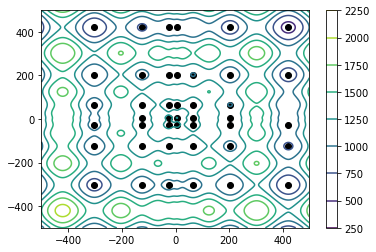

In [34]:
plt.scatter(res[:,0], res[:,1], color='black');
plt.contour(X,Y,Z); plt.colorbar();

In [35]:
k = 4
bounds = np.ones((k,2))*500; bounds[:,0] = bounds[:,1]*(-1);
bounds;

In [36]:
%run HXDY.ipynb

In [37]:
res = HXDY(fun=Schwefel, bounds=bounds, args=(), jac=Schwefel_gradient, tol=10000, 
                                  hess=Schwefel_hessian, epsilon=1e-2, maxCount=50, alpha=.1, cauchy_wildness=50,
                                  unfairness=2, N=100, keepLastX = 10, numWorkers=-1, method='Newton-CG'); 

[537.42128552 537.42128552          inf          inf          inf
          inf          inf          inf          inf          inf]
[537.42128552 537.42128552 537.42128552          inf          inf
          inf          inf          inf          inf          inf]
[537.42128552 537.42128552 537.42128552 537.42128552          inf
          inf          inf          inf          inf          inf]
[537.42128552 537.42128552 537.42128552 537.42128552 537.42128552
          inf          inf          inf          inf          inf]
[537.42128552 537.42128552 537.42128552 537.42128552 537.42128552
 537.42128552          inf          inf          inf          inf]
[537.42128552 537.42128552 537.42128552 537.42128552 537.42128552
 537.42128552 537.42128552          inf          inf          inf]
[537.42128552 537.42128552 537.42128552 537.42128552 537.42128552
 537.42128552 537.42128552 537.42128552          inf          inf]
[537.42128552 537.42128552 537.42128552 537.42128552 537.42128552
 53

Process ForkPoolWorker-25:
Process ForkPoolWorker-28:
Process ForkPoolWorker-27:
Process ForkPoolWorker-26:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/david/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/david/anaconda3/lib/

In [58]:
process_time()

21.365151963

In [66]:
bounds

array([[-500.,  500.],
       [-500.,  500.],
       [-500.,  500.],
       [-500.,  500.]])

In [38]:
res

array([[ 420.96874102, -302.52491846,  420.96876011,  420.96876393,
         537.42128552],
       [ 203.81421331,  420.9687336 ,  420.96873166,  420.96874171,
         636.1226203 ],
       [ 420.96875548,  420.96875612, -124.82934575,  420.9687651 ,
         715.08966467],
       ...,
       [-124.82935527,  -25.87743929,    5.23918878,  -25.87742604,
        1919.92710441],
       [  65.54786572,  -25.87740223,    5.23918363,   65.54787439,
        1939.61627425],
       [ -25.87741365,  -25.87741328,  -25.87740795,  -25.87742107,
        1998.58265911]])

In [35]:
%load_ext line_profiler

In [36]:
%lprun -f walk_individuals -f HXDY HXDY(fun=Schwefel, bounds=bounds, args=(), jac=Schwefel_gradient, tol=10000, hess=Schwefel_hessian, epsilon=1e-2, maxCount=50, alpha=.1, cauchy_wildness=50, unfairness=2, N=100, keepLastX = 10, numWorkers=-1, method='Newton-CG'); 

[418.98295091 418.98295091          inf          inf          inf
          inf          inf          inf          inf          inf]
[418.98295091 418.98295091 418.98295091          inf          inf
          inf          inf          inf          inf          inf]
[418.98295091 418.98295091 418.98295091 418.98295091          inf
          inf          inf          inf          inf          inf]
[418.98295091 418.98295091 418.98295091 418.98295091 418.98295091
          inf          inf          inf          inf          inf]
[418.98295091 418.98295091 418.98295091 418.98295091 418.98295091
 418.98295091          inf          inf          inf          inf]
[418.98295091 418.98295091 418.98295091 418.98295091 418.98295091
 418.98295091 418.98295091          inf          inf          inf]
[418.98295091 418.98295091 418.98295091 418.98295091 418.98295091
 418.98295091 418.98295091 418.98295091          inf          inf]
[418.98295091 418.98295091 418.98295091 418.98295091 418.98295091
 41

Timer unit: 1e-06 s

Total time: 116.303 s
File: <ipython-input-33-6d223b88e242>
Function: HXDY at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def HXDY(fun, bounds, jac, tol, args=(), method='L-BFGS-B', hess=None, x0=None,
     2                                               numWorkers = -1,
     3                                               epsilon = 1e-8,
     4                                               maxCount = 20,
     5                                               alpha = 1.,
     6                                               unfairness = 5,
     7                                               cauchy_wildness = 60,
     8                                               minImprovement = 1.1,
     9                                               N = 100,
    10                                               keepLastX = 5, maxRuns=30, returnedThreshold=0.6,
    11                                       

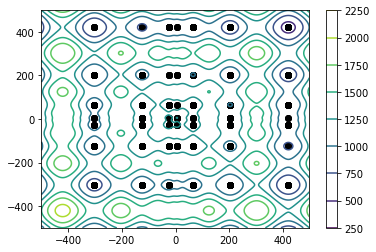

In [37]:
plt.scatter(res[:,0], res[:,1], color='black');
plt.contour(X,Y,Z); plt.colorbar();

In [38]:
res[0]

array([420.96871668, 420.96874587, 420.96874688, 420.96871438,
       418.98295091])

In [39]:
res[1]

array([ 420.96877738,  420.96872931, -302.52491406,  420.96874343,
        537.42128552])

In [40]:
res.shape

(425, 5)

In [41]:
res

array([[ 420.96871668,  420.96874587,  420.96874688,  420.96871438,
         418.98295091],
       [ 420.96877738,  420.96872931, -302.52491406,  420.96874343,
         537.42128552],
       [ 420.96874974,  420.96874197,  203.81424728,  420.96873567,
         636.1226203 ],
       ...,
       [  65.54788207,   65.54788248,    5.23919973,  -25.8774098 ,
        1939.61627425],
       [   5.23920613,    5.23922231,  -25.87741374,   65.54786811,
        1999.30595457],
       [   5.23921774,    5.23920774,   65.54788384,  -25.87741128,
        1999.30595457]])

### Rosen function

In [42]:
from scipy.optimize import rosen, rosen_der, rosen_hess

In [43]:
X = np.arange(-2.5, 2.5, 1e-2)
Y = np.arange(-2.5, 2.5, 1e-2)

In [44]:
Z = np.empty((len(X),len(Y)))

In [45]:
for i in range(len(X)):
    for j in range((len(Y))):
        Z[i,j] = rosen(np.array([X[i],Y[j]]))

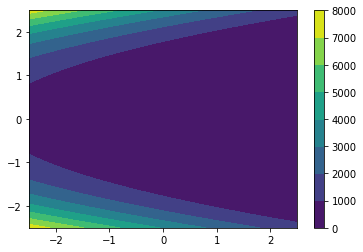

In [46]:
plt.contourf(X,Y,Z); plt.colorbar();

In [47]:
k = 2
bounds = np.ones((k,2))*3; bounds[:,0] = bounds[:,1]*(-1);
bounds;

In [48]:
res = HXDY(fun=rosen, bounds=bounds, args=(), jac=rosen_der, tol=1e-8, 
                                  hess=rosen_hess, epsilon=1e-8, maxCount=50, alpha=.1, cauchy_wildness=50,
                                  unfairness=2, N=100, keepLastX = 10, numWorkers=-1, method='Newton-CG'); 

[2.00556147e-11 2.00556147e-11            inf            inf
            inf            inf            inf            inf
            inf            inf]
[2.00556147e-11 2.00556147e-11 2.00556147e-11            inf
            inf            inf            inf            inf
            inf            inf]
[2.00556147e-11 2.00556147e-11 2.00556147e-11 2.00556147e-11
            inf            inf            inf            inf
            inf            inf]
[2.00556147e-11 2.00556147e-11 2.00556147e-11 2.00556147e-11
 2.00556147e-11            inf            inf            inf
            inf            inf]
[2.00556147e-11 2.00556147e-11 2.00556147e-11 2.00556147e-11
 2.00556147e-11 2.00556147e-11            inf            inf
            inf            inf]
[2.00556147e-11 2.00556147e-11 2.00556147e-11 2.00556147e-11
 2.00556147e-11 2.00556147e-11 2.00556147e-11            inf
            inf            inf]
[2.00556147e-11 2.00556147e-11 2.00556147e-11 2.00556147e-11
 2.00556147e-11

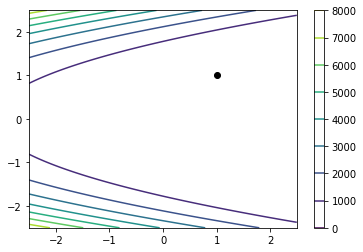

In [49]:
plt.scatter(res[:,0], res[:,1], color='black');
plt.contour(X,Y,Z); plt.colorbar();

In [50]:
res

array([[9.99995522e-01, 9.99991037e-01, 2.00556147e-11]])